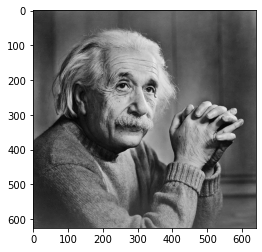

In [1]:
# lab1 question4
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('Einstein.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, 'gray', vmin=0, vmax=255)

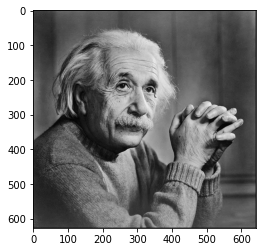

In [11]:
def padding(picture):
    row = picture.shape[0]
    col = picture.shape[1]
    zero_element = [0] * (col+2)
    p_img = []
    p_img.append(zero_element)
    for i in range(0, row):
        test_list = []
        test_list.append(0)
        for j in range(0, col):
            test_list.append(picture[i][j])
        test_list.append(0)
        p_img.append(test_list)
    p_img.append(zero_element)
    p_img = np.array(p_img)
    return p_img

p_img = padding(img)
plt.imshow(p_img, 'gray', vmin=0, vmax=255)

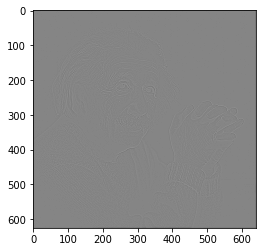

In [8]:
l_operator = np.array([[0,1,0],[1,-4,1],[0,1,0]])
def convolution(img, x, y):
    sum = 0
    target = []
    for i in range(x-1, x+2):
        listi = []
        for j in range(y-1, y+2):
           listi.append(img[i][j])
        target.append(listi)
    target = target * l_operator
    for i in range(0, l_operator.shape[0]):
        for j in range(0, l_operator.shape[1]):
            sum += target[i][j]
    return sum
result = []
for i in range(1, img.shape[0]+1):
    temp = []
    for j in range(1,img.shape[1]+1):
        temp.append(convolution(p_img,i,j))
    result.append(temp)
result = np.array(result)

# Contrast Stretching
max = result.max()
min = result.min()
c_result = (result-min)*(255/(max-min))
plt.imshow(c_result, 'gray',vmin=0, vmax=255)